In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [3]:
file = ('C:\\Users\\mjjyo\\OneDrive\\Desktop\\openavenuesmicrointernship\\open_ave_data.csv')
file = pd.read_csv(file)

In [45]:
file.drop('Unnamed: 0', axis=1)
#making all lowercase
file = file.apply(lambda x: x.astype(str).str.lower())
#getting rid of labels within data
file['findings'] = file['findings'].str.replace('findings', '')
file['clinicaldata'] = file['clinicaldata'].str.replace('clinical', '')
file['clinicaldata'] = file['clinicaldata'].str.replace('indication', '')
file['clinicaldata'] = file['clinicaldata'].str.replace('history', '')
file['clinicaldata'] = file['clinicaldata'].str.replace('data', '')
file['clinicaldata'] = file['clinicaldata'].str.replace('information', '')
file['ExamName'] = file['ExamName'].str.replace('exam', '')
file['impression'] = file['impression'].str.replace('impression', '')



In [46]:
file = file.dropna()
file

,Unnamed: 0,ReportText,findings,clinicaldata,ExamName,impression
0,0,exam: chest radiography exam date: 06/01/2019 ...,: lungs/pleura: no focal opacities evident. no...,: cough. \n\n,: chest radiography date: 06/01/2019 08:30 pm...,: normal 2-view chest radiography.
1,1,exam: chest radiography exam date: 05/23/2020 ...,: lungs/pleura: no focal opacities evident. no...,: chest pain. \n\n,: chest radiography date: 05/23/2020 12:03 pm...,: no acute cardiopulmonary abnormality.
2,2,exam: chest radiography exam date: 12/13/2019 ...,: lungs/pleura: no focal opacities evident. no...,: chest pain. \n\n,: chest radiography date: 12/13/2019 03:40 pm...,: no acute cardiopulmonary process.
3,3,exam: - chest-portable history: chest pain com...,: heart size appears normal. lungs clear. \n\n,: chest pain \n\n,: - chest-portable\n\ncomparison: none,: lungs clear
4,4,exam: chest radiography exam date: 06/17/2021 ...,: lungs/pleura: no focal opacities evident. no...,": chest pain, shortness of breath. \n\n",: chest radiography date: 06/17/2021 03:09 pm...,: normal single view chest.
...,...,...,...,...,...,...
949,982,chest radiograph: pa and lateral views history...,lungs: the lung fields demonstrate normal degr...,: r05 cough \n\n,chest radiograph: pa and lateral views\n\ncomp...,: no acute pulmonary disease.
950,983,exam description: x-ray single view chest. cli...,: the lungs are well expanded and are clear. t...,": 68 years male, sob \n\n",description: x-ray single view chest.\n\ntech...,: no evidence of acute intrathoracic disease. ...
951,984,exam: chest radiography exam date: 04/02/2018 ...,: lungs/pleura: no focal opacities evident. no...,: chest pain. \n\n,: chest radiography date: 04/02/2018 10:49 pm...,: normal single view chest.
952,985,exam: xr chest 1 vw history: chest pain techni...,: lines and tubes: none cardiomediastinal: the...,: chest pain \n\n,: xr chest 1 vw\n\ntechnique: chest ap view(s)...,: no acute cardiopulmonary process dictated by...


In [47]:
#files to do idf on
exam_names = file['ExamName'].dropna().tolist()
print(len(exam_names))

impressions= file['impression'].dropna().tolist()
print(len(impressions))

findings = file['findings'].dropna().tolist()
print(len(findings))

clinical_data = file['clinicaldata'].dropna().tolist()
print(len(clinical_data))


954
954
954
954


In [48]:
#list of corpus
corpus = exam_names + impressions + findings + clinical_data


In [49]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '01', '02', ..., 'your', 'zip', 'zone'], dtype=object)

In [50]:
print(X.shape)

(3816, 1077)


In [51]:
X.toarray()

array([[0.        , 0.34647238, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
X.shape

(3816, 1077)

In [53]:
height = 3816
y = pd.DataFrame(0, index=range(height), columns=range(1))

In [54]:
y.shape

y.loc[0:953] = 'ExamName'
y.loc[954:1907] = 'impression'
y.loc[1908:2861] = 'findings'
y.loc[2862:3816] = 'clinicaldata'


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [56]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3 ,
                                                    random_state=1234)


In [57]:
lr_model = LogisticRegression(random_state=1234)
param_dict = {'C': [0.001, 0.01, 0.1, 1, 10],
             'solver': ['sag', 'lbfgs', 'saga']}

In [58]:
grid_search = GridSearchCV(lr_model, param_dict)
grid_search.fit(x_train, y_train.values.ravel())
display(grid_search.best_params_)
print("Cross-Validated Score of the Best Estimator: %.3f" % grid_search.best_score_)


C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 10, 'solver': 'sag'}

Cross-Validated Score of the Best Estimator: 0.991


In [59]:
lr=LogisticRegression(C=1, solver ='saga')
lr.fit(x_train, y_train.values.ravel())
lr_preds = lr.predict(x_test)

In [60]:

print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print("Accuracy Score: %.3f" % accuracy_score(y_test, lr_preds))

[[282   0   0   1]
 [  0 292   1   1]
 [  0   0 295   1]
 [  0   0   4 268]]
              precision    recall  f1-score   support

    ExamName       1.00      1.00      1.00       283
clinicaldata       1.00      0.99      1.00       294
    findings       0.98      1.00      0.99       296
  impression       0.99      0.99      0.99       272

    accuracy                           0.99      1145
   macro avg       0.99      0.99      0.99      1145
weighted avg       0.99      0.99      0.99      1145

Accuracy Score: 0.993


In [61]:
cm = confusion_matrix(y_test, lr_preds)
score = accuracy_score(y_test, lr_preds)

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy Score 0.9930131004366812')

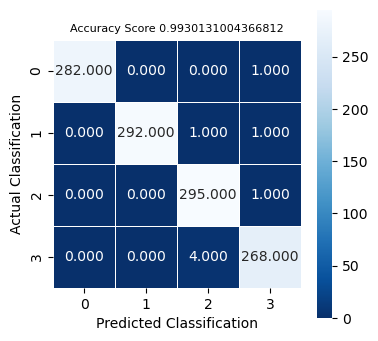

In [63]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=0.5, square=
           True, cmap='Blues_r')
plt.ylabel('Actual Classification')
plt.xlabel('Predicted Classification')
all_sample_title = f'Accuracy Score {score}'
plt.title(all_sample_title, size=8)